In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
TractData = []
for file_name in os.listdir('./'):
    if 'Tract' in file_name:
        TractData.append(file_name)
TractData

['TractTravelProbabilitiesNoTrunc.csv',
 'TractTravelRawNumbers.csv',
 'TractTravelProbabilities.csv',
 'TractSummary159.csv']

In [3]:
probabilities = pd.read_csv(TractData[2], header=None)
summary = pd.read_csv(TractData[3])
summary


,Tract,Sus,Inf,Symp,RecoveredCalc,Lat,Lon
0,T0,5176,236,59,60,47.727466,-122.291331
1,T1,7246,46,12,41,47.726673,-122.308734
2,T2,2424,16,3,44,47.730744,-122.335787
3,T3,4601,73,21,41,47.728213,-122.352721
4,T4,3668,162,46,708,47.717678,-122.354194
5,T5,3197,33,11,56,47.720704,-122.366775
6,T6,6751,240,67,304,47.717065,-122.327832
7,T7,4080,75,16,19,47.716134,-122.300443
8,T8,2571,3,0,26,47.711602,-122.286037
9,T9,1939,56,13,37,47.709381,-122.277940


In [4]:
G = nx.Graph()
pos = {}
# add nodes
for row in summary.iterrows():
    G.add_node(row[0], 
               Tract=row[1]['Tract'], 
               Sus=row[1]['Sus'], 
               Inf=row[1]['Inf'], 
               Symp=row[1]['Symp'],
               RecoveredCalc=row[1]['RecoveredCalc'],
               Lat=row[1]['Lat'],
               Lon=row[1]['Lon']
              )
    pos[row[0]] = [row[1]['Lat'], row[1]['Lon']]

N = len(G.nodes)
# add edges
for i in range(N):
    for j in range(N):
        if probabilities[j][i] != 0:
            G.add_edge(i,j, weight=probabilities[j][i])


In [23]:
# nx.draw(G, pos)

for key, val in pos.items():
    print(key, val)

0 [47.727466, -122.291331]
1 [47.726673, -122.30873400000002]
2 [47.730744, -122.33578700000001]
3 [47.728213000000004, -122.352721]
4 [47.717678, -122.35419399999999]
5 [47.720704, -122.366775]
6 [47.717065000000005, -122.327832]
7 [47.716134000000004, -122.30044299999999]
8 [47.711602, -122.28603700000001]
9 [47.709381, -122.27793999999999]
10 [47.706435, -122.29671100000002]
11 [47.706579, -122.306423]
12 [47.707498, -122.323153]
13 [47.702743, -122.342615]
14 [47.705858, -122.36232700000001]
15 [47.695719, -122.393822]
16 [47.697634, -122.380292]
17 [47.696627, -122.359175]
18 [47.694097, -122.34253400000001]
19 [47.695513, -122.323998]
20 [47.695681, -122.311329]
21 [47.694821000000005, -122.298121]
22 [47.694885, -122.28139099999999]
23 [47.686147999999996, -122.28796299999999]
24 [47.682968, -122.30273899999999]
25 [47.682682, -122.311348]
26 [47.686776, -122.33065]
27 [47.684794000000004, -122.349713]
28 [47.684992, -122.36063700000001]
29 [47.684907, -122.373814]
30 [47.684715

In [30]:
import arcgis
from arcgis.gis import GIS
from arcgis.geometry import Point, Polyline
from arcgis.mapping import WebMap

gis = GIS()

seattle = gis.map('Seattle')

for key,val in pos.items():
    pt = Point({"x":val[0], "y":val[1], "spatialReference":{"wkid":32148}})
    seattle.draw(pt)
# mapview = MapView(gis)
# seattle.draw('point', pos[0])
# seattle.zoom = 

seattle
# mapview.draw('point', attributes=pos)
# mapview

MapView(layout=Layout(height='400px', width='100%'))

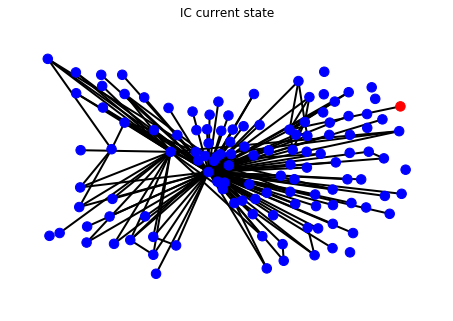

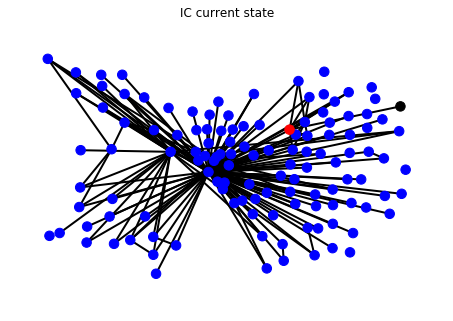

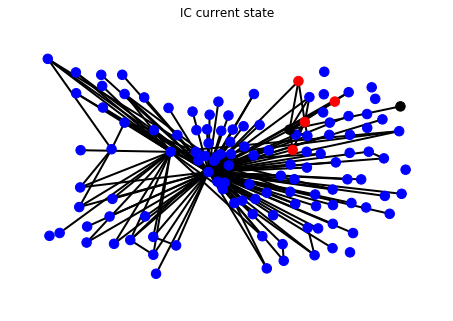

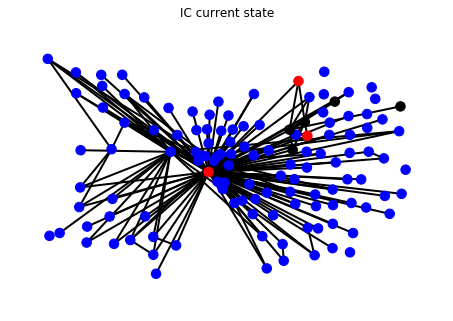

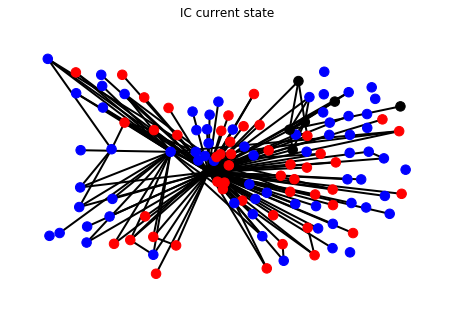

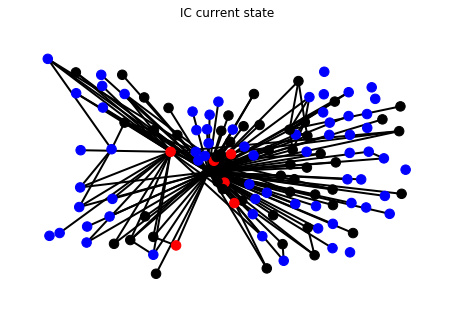

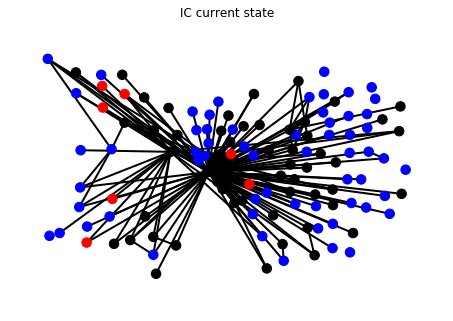

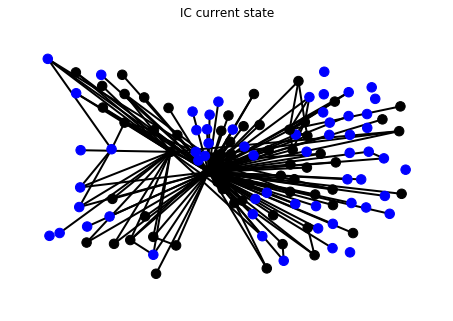

In [7]:
import sys
sys.path.extend(['../'])
from gmi import GMI


simulation = GMI(G)

simulation.dynamic_process(view=1)

In [29]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap
from arcgis.geometry import Point, Polyline
    
gis = GIS()
germany = gis.map('Seattle')

# Draw Train Stations
for location, coord in pos.items():
    pt = Point({"x" : coord[0], "y" : coord[1], "spatialReference" : {"wkid" : 4326}})
#     germany.draw(pt)
    germany.draw('point', [coord[0], coord[1]])
germany

MapView(layout=Layout(height='400px', width='100%'))